In [1]:
import pandas as pd
import numpy as np
import plotly.express as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('BRCA.csv')

In [3]:
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [4]:
data.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [5]:
data.shape

(341, 16)

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [8]:
data.shape

(317, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [10]:
data.Gender.value_counts()

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64

In [11]:
data.Patient_Status.value_counts()

Patient_Status
Alive    255
Dead      62
Name: count, dtype: int64

In [12]:
round(data.Patient_Status.value_counts() * 100/len(data),1) #here 'round' is use for round the output and ,1 is use for the decimal
                                                            #digits that how much digit u want to see

Patient_Status
Alive    80.4
Dead     19.6
Name: count, dtype: float64

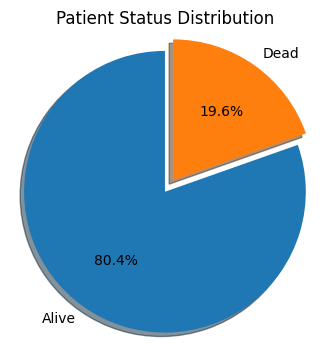

In [13]:
patient_status_counts = data.Patient_Status.value_counts()
patient_status_percent = round(patient_status_counts * 100 / len(data), 1)

plt.figure(figsize=(4,4))
plt.pie(patient_status_percent, labels=patient_status_percent.index, autopct='%1.1f%%', startangle=90, shadow=True, explode = (0,0.1))
plt.title('Patient Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()


In [14]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [15]:
# gender = data['Gender'].value_counts()

In [16]:
# plt.figure(figsize=(4,4))
# plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90,shadow=True)
# plt.title('Gender')
# plt.axis('equal')
# plt.show()

In [17]:
# Histology = data['Histology'].value_counts()

In [18]:
# Histology

In [19]:
# plt.figure(figsize=(4,4))
# plt.pie(Histology, labels=Histology.index, autopct='%1.1f%%', startangle=90,shadow=True)
# plt.title('Histology')
# plt.axis('equal')
# plt.show()

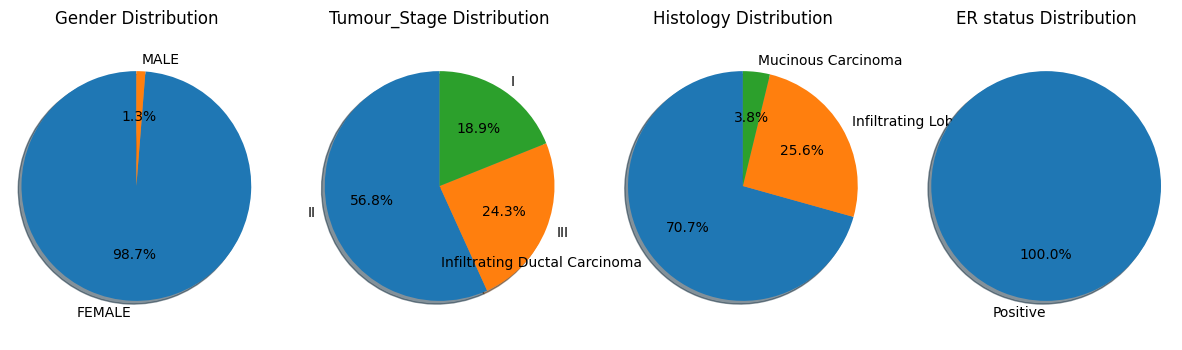

In [20]:
def create_pie_charts(data, columns):
    num_charts = len(columns)
    fig, axes = plt.subplots(1, num_charts, figsize=(15, 4))

    for i, column in enumerate(columns):
        values = data[column].value_counts()
        axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, shadow=True)
        axes[i].set_title(f'{column} Distribution')
        axes[i].axis('equal')

    plt.show()

# Example usage:
columns_to_plot = ['Gender', 'Tumour_Stage', 'Histology', 'ER status']
create_pie_charts(data, columns_to_plot)


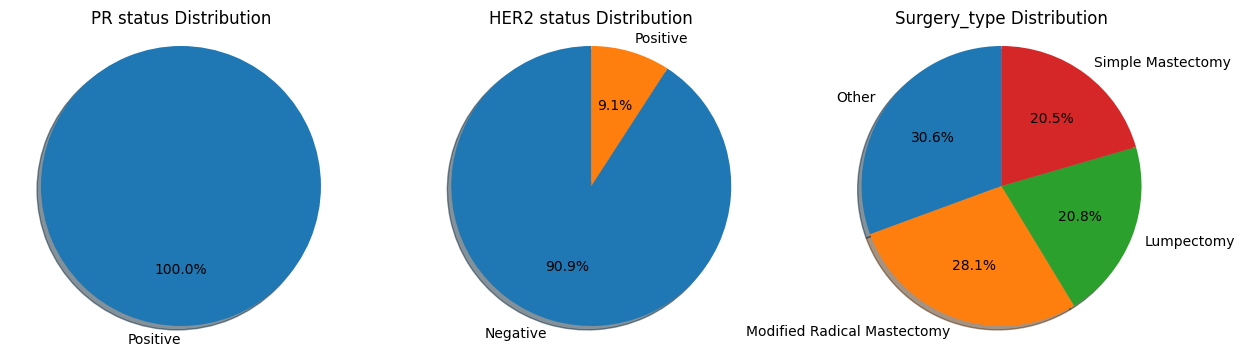

In [21]:
def create_pie_charts(data, columns):
    num_charts = len(columns)
    fig, axes = plt.subplots(1, num_charts, figsize=(15, 4))

    for i, column in enumerate(columns):
        values = data[column].value_counts()
        axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, shadow=True)
        axes[i].set_title(f'{column} Distribution')
        axes[i].axis('equal')

    plt.show()

# Example usage:
columns_to_plot = ['PR status',
       'HER2 status', 'Surgery_type']
create_pie_charts(data, columns_to_plot)

In [22]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [23]:
data.drop(['Patient_ID','ER status', 'PR status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit' ], axis=1, inplace=True)

In [24]:
data

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Patient_Status
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Alive
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Dead
2,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Negative,Alive
3,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Negative,Alive
4,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Negative,Dead
...,...,...,...,...,...,...,...,...,...,...
329,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Dead
330,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Negative,Dead
331,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Negative,Dead
332,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Dead


In [25]:
from pycaret.classification import *
s = setup(data, target = 'Patient_Status', session_id = 123, fold=5)

,Description,Value
0,Session id,123
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 10)"
5,Transformed data shape,"(317, 14)"
6,Transformed train set shape,"(221, 14)"
7,Transformed test set shape,"(96, 14)"
8,Numeric features,5
9,Categorical features,4


In [26]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'Patient_Status', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 10)"
5,Transformed data shape,"(317, 14)"
6,Transformed train set shape,"(221, 14)"
7,Transformed test set shape,"(96, 14)"
8,Numeric features,5
9,Categorical features,4


In [27]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [28]:
# functional API
best = compare_models()

# # OOP API
# best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8100,0.6460,0.8100,0.7521,0.7664,0.1897,0.2127,0.4360
lda,Linear Discriminant Analysis,0.8056,0.5472,0.8056,0.6876,0.7264,0.0296,0.0496,0.1780
lr,Logistic Regression,0.8055,0.5366,0.8055,0.6489,0.7187,0.0000,0.0000,4.2380
ridge,Ridge Classifier,0.8055,0.5428,0.8055,0.6489,0.7187,0.0000,0.0000,0.1340
dummy,Dummy Classifier,0.8055,0.5000,0.8055,0.6489,0.7187,0.0000,0.0000,0.1160
rf,Random Forest Classifier,0.8009,0.5659,0.8009,0.6482,0.7164,-0.0084,-0.0144,0.2220
lightgbm,Light Gradient Boosting Machine,0.7827,0.6223,0.7827,0.7334,0.7452,0.1232,0.1443,0.1620
et,Extra Trees Classifier,0.7783,0.5060,0.7783,0.6590,0.7111,-0.0212,-0.0356,0.3240
knn,K Neighbors Classifier,0.7736,0.4267,0.7736,0.6437,0.7026,-0.0560,-0.0787,0.6260
ada,Ada Boost Classifier,0.7601,0.6071,0.7601,0.7041,0.7281,0.0741,0.0686,0.1480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [29]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


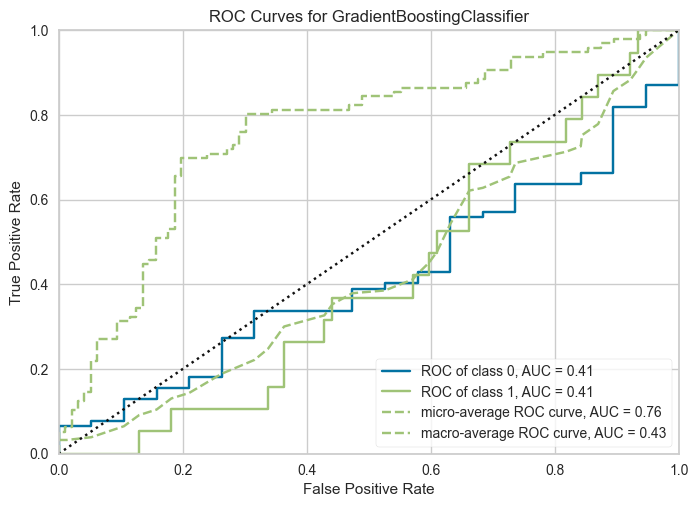

In [30]:
# functional API
plot_model(best, plot = 'auc')

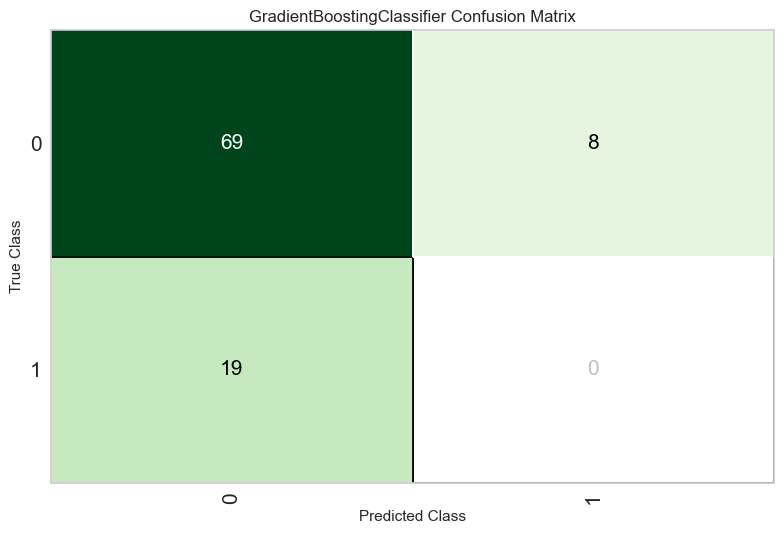

In [31]:
# functional API
plot_model(best, plot = 'confusion_matrix')

In [32]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7188,0.4142,0.7188,0.6289,0.6708,-0.1329,-0.1498


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Patient_Status,prediction_label,prediction_score
76,68.0,FEMALE,-0.826320,1.69120,-0.13349,-0.18214,II,Infiltrating Ductal Carcinoma,Negative,Dead,Alive,0.9531
20,87.0,FEMALE,-0.087485,1.11110,-0.56692,1.22370,II,Infiltrating Ductal Carcinoma,Negative,Alive,Dead,0.6551
106,62.0,FEMALE,0.373550,0.78312,-0.57445,-0.96343,I,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9771
181,74.0,FEMALE,-0.210820,-0.97873,-1.06000,-0.84252,II,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9567
137,65.0,FEMALE,-0.444700,1.49460,-1.10740,-0.25249,II,Infiltrating Lobular Carcinoma,Negative,Alive,Alive,0.9205
...,...,...,...,...,...,...,...,...,...,...,...,...
316,54.0,FEMALE,-1.231300,-0.76767,0.86160,0.23905,II,Infiltrating Lobular Carcinoma,Negative,Alive,Alive,0.9541
62,76.0,FEMALE,0.043546,-0.40171,0.46685,1.04780,II,Infiltrating Ductal Carcinoma,Negative,Alive,Dead,0.7201
165,36.0,FEMALE,0.469310,1.55260,-0.16524,-0.27599,III,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9916
215,63.0,FEMALE,0.176700,0.44394,-0.25075,-0.37407,II,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9003


In [33]:
predictions = predict_model(best, data=data)
predictions.head(2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9085,0.8462,0.9085,0.9050,0.9043,0.6842,0.6912


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Patient_Status,prediction_label,prediction_score
0,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9391
1,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Negative,Dead,Dead,0.8444


In [34]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             ma

In [35]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\User\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Protein1', 'Protein2',
                                             'Protein3', 'Protein4'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_node

In [39]:
new_patient = pd.DataFrame({
    'Age': [54],
    'Gender': ['FEMALE'],
    'Protein1': [0.231800],
    'Protein2': [0.61804],
    'Protein3': [-0.55779],
    'Protein4': [-0.517350],
    'Tumour_Stage': ['III'],
    'Histology': ['Infiltrating Ductal Carcinoma'],
    'HER2 status': ['Positive']
})

prediction = predict_model(loaded_model, data=new_patient)
print(prediction[['prediction_label', 'prediction_score']])


  prediction_label  prediction_score
0            Alive            0.9419


In [40]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7188,0.4142,0.7188,0.6289,0.6708,-0.1329,-0.1498


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Patient_Status,prediction_label,prediction_score
76,68.0,FEMALE,-0.826320,1.69120,-0.13349,-0.18214,II,Infiltrating Ductal Carcinoma,Negative,Dead,Alive,0.9531
20,87.0,FEMALE,-0.087485,1.11110,-0.56692,1.22370,II,Infiltrating Ductal Carcinoma,Negative,Alive,Dead,0.6551
106,62.0,FEMALE,0.373550,0.78312,-0.57445,-0.96343,I,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9771
181,74.0,FEMALE,-0.210820,-0.97873,-1.06000,-0.84252,II,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9567
137,65.0,FEMALE,-0.444700,1.49460,-1.10740,-0.25249,II,Infiltrating Lobular Carcinoma,Negative,Alive,Alive,0.9205
...,...,...,...,...,...,...,...,...,...,...,...,...
316,54.0,FEMALE,-1.231300,-0.76767,0.86160,0.23905,II,Infiltrating Lobular Carcinoma,Negative,Alive,Alive,0.9541
62,76.0,FEMALE,0.043546,-0.40171,0.46685,1.04780,II,Infiltrating Ductal Carcinoma,Negative,Alive,Dead,0.7201
165,36.0,FEMALE,0.469310,1.55260,-0.16524,-0.27599,III,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9916
215,63.0,FEMALE,0.176700,0.44394,-0.25075,-0.37407,II,Infiltrating Ductal Carcinoma,Negative,Alive,Alive,0.9003
